<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relative Strength Index**
\
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.



*  An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
*   Therefore we buy when RSI < 30 and sell when RSI > 70



In [13]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
#Load the dta
from google.colab import files
uploaded=files.upload()

Saving WIPRO-2017.csv to WIPRO-2017 (1).csv


In [15]:
#store the data into a df
df = pd.read_csv('WIPRO-2017.csv')
#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73
...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48


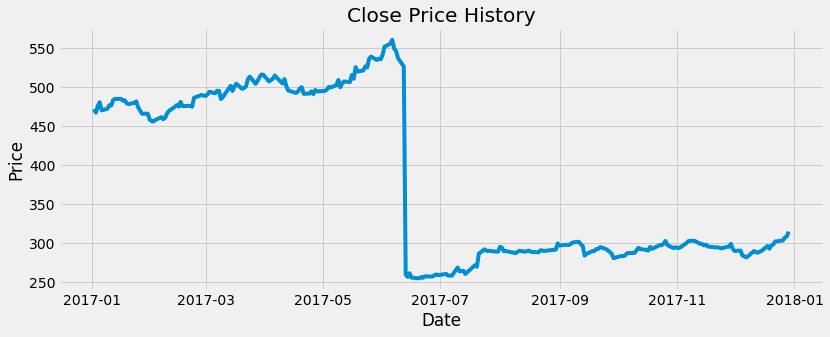

In [16]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [17]:
prices = []
c = 0
# Add the closing prices to the prices list and make sure we start at greater than 2 dollars to reduce outlier calculations.
while c < len(df):
    if df.iloc[c,4] > float(0.00):
        prices.append(df.iloc[c,4])
    c += 1
i = 0
upPrices=[]
downPrices=[]
#  Loop to hold up and down price movements
while i < len(prices):
    if i == 0:
        upPrices.append(0)
        downPrices.append(0)
    else:
        if (prices[i]-prices[i-1])>0:
            upPrices.append(prices[i]-prices[i-1])
            downPrices.append(0)
        else:
            downPrices.append(prices[i]-prices[i-1])
            upPrices.append(0)
    i += 1
x = 0
avg_gain = []
avg_loss = []

while x < len(upPrices):
    if x <15:
        avg_gain.append(0)
        avg_loss.append(0)
    else:
        sumGain = 0
        sumLoss = 0
        y = x-14
        while y<=x:
            sumGain += upPrices[y]
            sumLoss += downPrices[y]
            y += 1
        avg_gain.append(sumGain/14)
        avg_loss.append(abs(sumLoss/14))
    x += 1

# calculate rs and rsi
p = 0
# RS = []
RSI = []
while p < len(prices):
    if p <15:
        # RS.append(0)
        RSI.append(0)
    else:
        RSvalue = (avg_gain[p]/avg_loss[p])
        # RS.append(RSvalue)
        RSI.append(100 - (100/(1+RSvalue)))
    p+=1

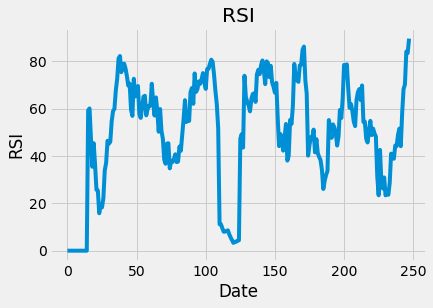

In [18]:
plt.plot(RSI, label='RSI')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

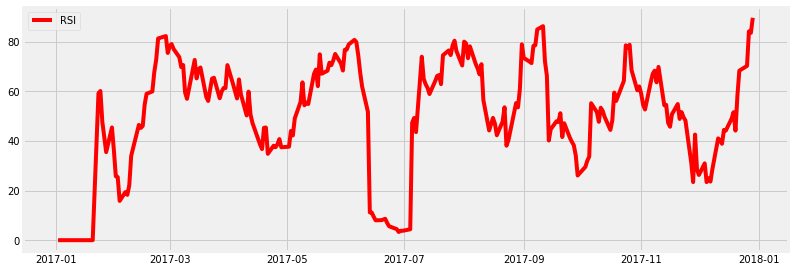

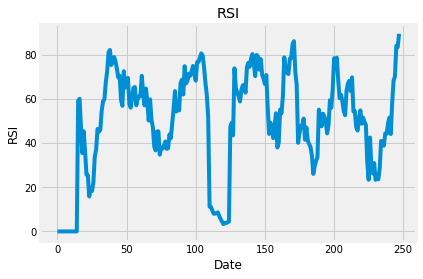

In [12]:
#plot rsi
plt.plot(RSI, label='RSI')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

In [9]:
RSI

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 59.205426356589136,
 60.07866273352999,
 47.69921436588102,
 35.464535464535444,
 45.39641943734012,
 36.28841607565012,
 25.746268656716452,
 25.429975429975457,
 15.811373092926587,
 19.389110225763616,
 18.263090676883735,
 22.119205298013185,
 33.94077448747149,
 37.125748502994014,
 46.42857142857143,
 45.198329853862184,
 46.01487778958554,
 54.609929078014204,
 58.97155361050328,
 59.893048128342244,
 67.714631197098,
 72.72727272727272,
 81.25,
 82.21343873517785,
 75.40514775977125,
 78.28185328185329,
 78.99159663865547,
 77.04081632653062,
 73.71031746031746,
 69.71428571428572,
 70.55555555555556,
 59.51265229615742,
 56.92921236291126,
 72.59696458684655,
 65.16679596586502,
 68.81569726699368,
 69.54732510288066,
 57.70348837209305,
 56.075471698113226,
 60.501567398119114,
 65.04854368932038,
 65.4320987654321,
 57.16072545340837,
 59.863098942128204,
 61.26126126126126,
 61.26126126126126,
 70.5059920106525,
 